In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
# Text file data converted to integer data type
File_data = np.loadtxt("data/lstm_200_400", dtype=int)
print(File_data)

[[0 0]
 [0 0]
 [0 0]
 ...
 [6 6]
 [6 6]
 [6 6]]


In [69]:
p1_array = np.arange(50, 351, 50)
p2_array = np.arange(50, 1001, 50)

def get_file_names(p1_array, p2_array):
    name_array = []
    for p1 in p1_array:
        for p2 in p2_array:
            name_array.append(f"lstm_{str(p1)}_{str(p2)}")
    return name_array

all_file_names = get_file_names(p1_array, p2_array)

In [68]:
def save_conf_matrix(file_name):
    File_data = np.loadtxt(f"data/{file_name}", dtype=int)
    
    data = np.transpose(File_data)
    #print("Data is", data)
    #print("========")
    y_valid, y_pred = data[0], data[1]
    #print(confusion_matrix(y_valid, y_pred))
    cf_matrix = confusion_matrix(y_valid, y_pred)
    
    sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='Blues', annot = True)
    plt.savefig('Images/cf_matrix/{}.png'.format(file_name))
    plt.close()

#save_conf_matrix("lstm_50_100")

In [72]:
def get_results(file_name):
    File_data = np.loadtxt(f"data/{file_name}", dtype=int)
    
    data = np.transpose(File_data)
    y_valid, y_pred = data[0], data[1]
    print("Accuracy:", accuracy_score(y_valid, y_pred))
    print("F1 score:", f1_score(y_valid, y_pred, average = "weighted"))
    print("Precision:", precision_score(y_valid, y_pred, average='weighted'))
    print("Recall:", recall_score(y_valid, y_pred, average='weighted'))

In [ ]:
def save_all_matrices(all_file_names):
    for file_name in all_file_names:
        save_conf_matrix(file_name)

save_all_matrices(all_file_names)

In [48]:

def 
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1 score:", f1_score(y_valid, y_pred, average = "weighted"))
print("Precision:", precision_score(y_valid, y_pred, average='weighted'))
print("Recall:", recall_score(y_valid, y_pred, average='weighted'))

Accuracy: 0.9845505617977528
F1 score: 0.9844398361067724
Precision: 0.9846170628295452
Recall: 0.9845505617977528


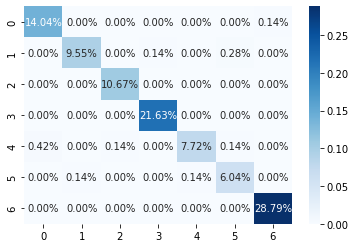

In [23]:
import seaborn as sns
cf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.savefig('test_result.png', dpi = 400)